In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt 



In [2]:

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation


In [3]:
X,y = make_regression(n_samples=100, n_features=1,n_informative=1,n_targets=1,noise=30,random_state=13)

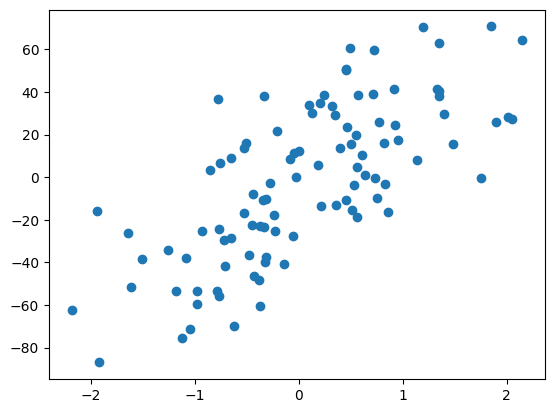

In [4]:
plt.scatter(X,y)
plt.show()

In [5]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.9379823]
-3.4421168380154685


In [6]:
import time

b = 150
m = -127.82
all_b = []
all_m = []
all_cost = []
all_lr = []

epochs = 1

start = time.time()

t0,t1 = 5,50
def learning_rate(t):
    return t0/(t+t1)

for i in range(epochs):
    for j in range(X.shape[0]):
        
        lr = learning_rate(i*X.shape[0]+j)
        idx = np.random.randint(X.shape[0],size=1)

        slope_b = -2 * (y[idx] - (m* X[idx])-b)
        slope_m = -2 * (y[idx] - (m * X[idx]) -b) * X[idx]
        cost = (y[idx] -m * X[idx] -b) **2

        b = b -(lr * slope_b)
        m = m - (lr * slope_m)
        all_b.append(b)
        all_m.append(m)
        all_cost.append(cost)
        all_lr.append(lr)

print("Total time taken",time.time() -start)

Total time taken 0.006975889205932617


In [7]:
len(all_cost)

100

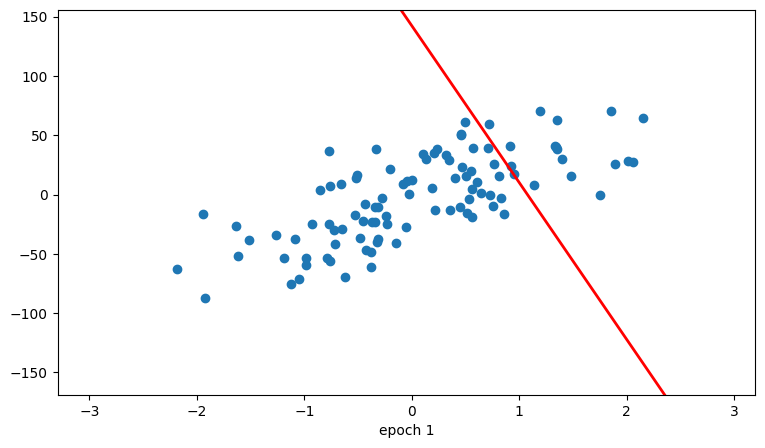

In [8]:
# fig, ax = plt.subplot(figsize=(9,5))

# x_i = np.arange(-3,3,0.1)
# y_i  = x_i * (-27) -150

# ax.scatter(X,y)
# line,  = ax.plot(x_i,x_i*50-4,'r-',linewidth = 2)

# def update(i):
#     label = 'epoch {0}'.format(i+1)
#     line.set_ydata(x_i*all_m[i] + all_b[i])
#     ax.set_xlabel(label)

# anim = FuncAnimation(fig,update,frames=100,interval=5)

# f = r"stochastic_animatoin_line_plot.gif"
# writergif = animation.PillowWriter(fps=2)
# anim.save(f,writer=writergif)
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, frames=100, interval=5)

f = r"stochastic_animation_line_plot.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

In [9]:
m_arr = np.linspace(-150,150,10)
b_arr = np.linspace(-150,150,10)
mGrid,bGrid = np.meshgrid(m_arr,b_arr)

final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T
z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))

z_arr = np.array(z_arr).reshape(10,10)

In [10]:
%matplotlib
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

#intercept graph

num_epoch = list(range(0,30))

fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim = (-150,150),ylim = (-150,150))

axis.contourf(m_arr,b_arr,z_arr)
line, = axis.plot([],[],lw = 2,color = 'white')
xdata,ydata = [],[]

# animation function

def animate(i):
    label = 'epoch {0}'.format(i+1)
    xdata.append(all_m[i])
    ydata.append(all_b[i])
    line.set_data(xdata,ydata)
    axis.set_xlabel(label)

    return line,

anim  = animation.FuncAnimation(fig,animate,frames=100,repeat=False,interval=100)
fig.show()

Using matplotlib backend: <object object at 0x13a36a3d0>
